In [1]:
import pandas as pd
a=pd.read_csv("C:\\Users\\suata\\Desktop\\scikit-ogren\\train.csv")

In [3]:
a.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
#casual,registered ve datetimeyi silelim
silinecek_kolonlar=['casual','datetime','registered']
a=a.drop(silinecek_kolonlar,axis=1)

In [6]:
corr_matrix=a.corr()
corr_matrix

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed     count  
season      0.190610  -0.147121  0.163439  
holiday     0.001929   0.008409 -0.005393  
workingday -0.010880   0.013373  0.011594  
weather     0.406244   0.007261 -0.128655  
temp       -0.064949  -0.017852  0.394454  
atemp      -0.043536  -0.057473  0.389784  
humidity    1.000000  -0.318607 -0.317371  
windspeed  -0.318607   1.000000  0.101369  
count      -0.317371   0.101369  1.000000

In [7]:
corr_matrix["count"].sort_values(ascending=False)

count         1.000000
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

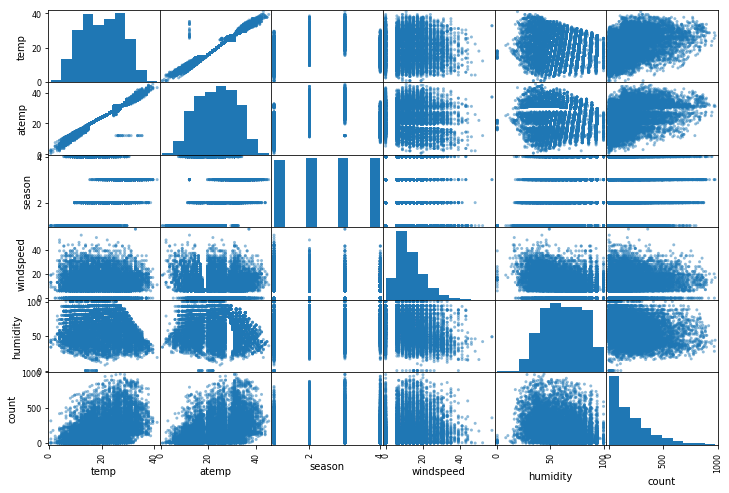

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["temp", "atemp", "season",
              "windspeed","humidity","count"]
scatter_matrix(a[attributes], figsize=(12, 8))
plt.show()

In [11]:
a['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [12]:
a['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

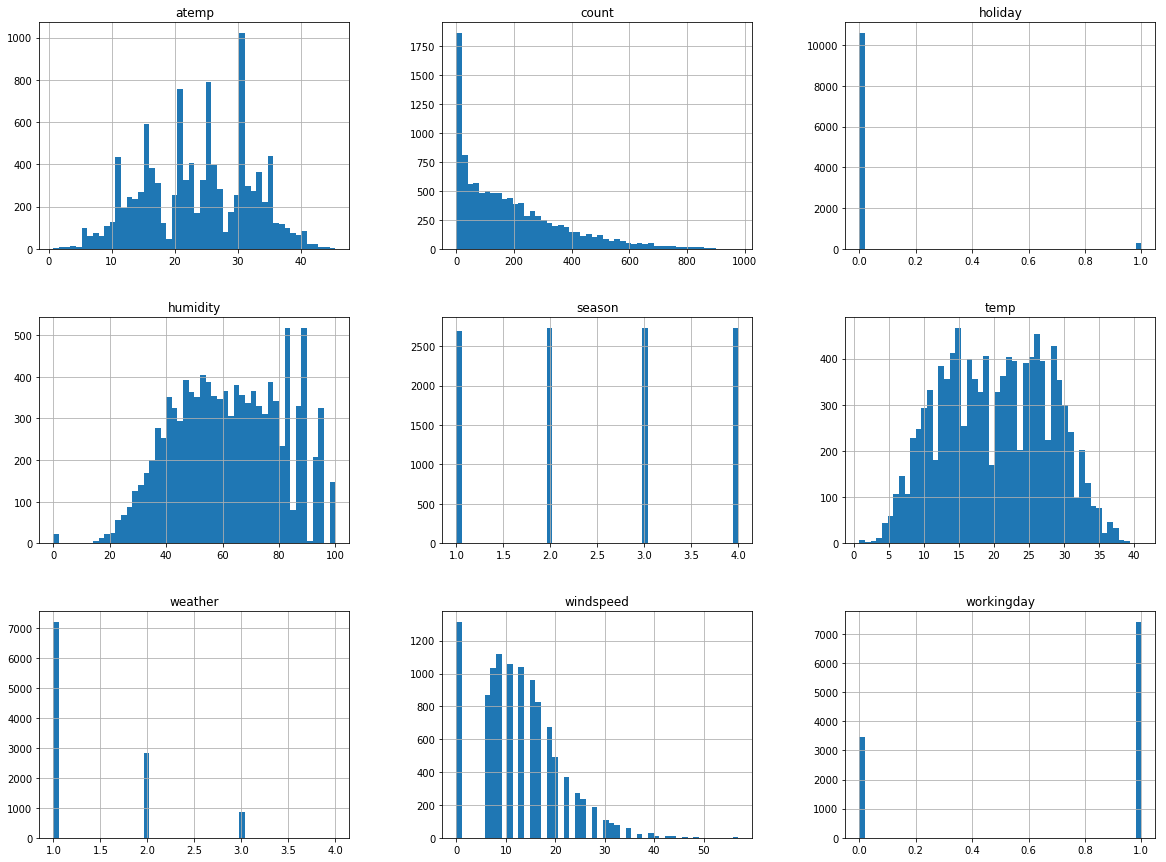

In [13]:
import matplotlib.pyplot as plt
a.hist(bins=50,figsize=(20,15))
plt.show()

## Transformations

In [14]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import numpy as np

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [16]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [17]:
#remove labels
axnolab=a.drop('count',axis=1)
#labels
axlab=a['count']

In [18]:
axnolab.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed
0       1        0           0        1  9.84  14.395        81        0.0
1       1        0           0        1  9.02  13.635        80        0.0
2       1        0           0        1  9.02  13.635        80        0.0
3       1        0           0        1  9.84  14.395        75        0.0
4       1        0           0        1  9.84  14.395        75        0.0

In [19]:
axlab.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [20]:
categorical_columns=['season','holiday','weather']
a_num = axnolab.drop(categorical_columns, axis=1)
a_ctg=axnolab[categorical_columns]
numerical_columns=list(a_num)

In [21]:
from sklearn.pipeline import Pipeline
#feature scaler dönütürücüsü
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_columns)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_columns)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [22]:
from sklearn.pipeline import FeatureUnion

#pipeline'larımız
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
#hadi gaza bas:)))
a_prepared = full_pipeline.fit_transform(axnolab)
print(a_prepared)
print
print(a_prepared.shape)

[[-1.46067232 -1.33366069 -1.09273697 ...,  0.          0.          0.        ]
 [-1.46067232 -1.43890721 -1.18242083 ...,  0.          0.          0.        ]
 [-1.46067232 -1.43890721 -1.18242083 ...,  0.          0.          0.        ]
 ..., 
 [ 0.68461625 -0.80742813 -0.91395927 ...,  0.          0.          0.        ]
 [ 0.68461625 -0.80742813 -0.73518157 ...,  0.          0.          0.        ]
 [ 0.68461625 -0.91267464 -0.82486544 ...,  0.          0.          0.        ]]

(10886L, 15L)


## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#daha önce hazırladığımız a_prepared ve a_labels değişkenlerimizi kullanıyoruz
lin_reg.fit(a_prepared, axlab)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
some_data = a.iloc[:5]
some_data

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

In [25]:
#aynı yerin etiketlerini alalım
some_labels = axlab.iloc[:5]
some_labels

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [26]:
some_data_prepared = full_pipeline.transform(some_data)

In [27]:
print("Predictions:", lin_reg.predict(some_data_prepared))

('Predictions:', array([ 12.375,   6.375,   6.375,  29.375,  29.375]))


In [28]:
from sklearn.metrics import mean_squared_error

#tahminlerini yap aslan modelim, modelimizin adı lin_reg hani yukarıda onu oluşturmuştuk
a_predictions = lin_reg.predict(a_prepared)
#şimdi modelin buldukları ile gerçek değerleri mukayese edelim:
lin_mse = mean_squared_error(axlab, a_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

154.04563412074134

Training data overfitted.

## Decision Treee Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(a_prepared, axlab)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [30]:
a_predictions = tree_reg.predict(a_prepared)
tree_mse = mean_squared_error(axlab, a_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

58.413033481887119

## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(a_prepared, axlab)

#bookmark adı: lezgin
a_predictions = forest_reg.predict(a_prepared)
forest_mse = mean_squared_error(axlab, a_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

80.352514547039618

## K-Fold Test on training data with decision tree regressor

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, a_prepared, axlab,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [33]:
#Sonuçları görelim
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

('Scores:', array([ 146.07347479,  206.14479246,  255.15890072,  225.94879528,
        234.43177885,  156.99386034,  232.947874  ,  244.77298329,
        255.08571683,  223.40749813]))
('Mean:', 218.09656746779805)
('Standard deviation:', 36.186213400699238)


## K-Fold Test on training data with linear regression

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, a_prepared, axlab,
                         scoring="neg_mean_squared_error", cv=10)
ling_reg_rmse_scores = np.sqrt(-scores)
#Sonuçları görelim
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(ling_reg_rmse_scores)

('Scores:', array([  9.85881207e+01,   1.15842009e+02,   1.59470429e+02,
         1.29183985e+02,   1.29155451e+02,   6.22290993e+12,
         1.91433706e+02,   1.95713250e+02,   2.25544140e+02,
         1.86609207e+02]))
('Mean:', 622290993126.79248)
('Standard deviation:', 1866872978903.1973)


## K-Fold Test on training data with random forest

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, a_prepared, axlab,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
#Sonuçları görelim
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

('Scores:', array([ 119.63559017,  142.10172677,  197.71720674,  164.39313686,
        175.19611337,  139.47375855,  206.0115936 ,  212.33962275,
        224.38881421,  198.0289219 ]))
('Mean:', 177.92864849173293)
('Standard deviation:', 33.582772866704623)


Decision tree regressor selected

## Parameter Selection

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'random_state': [42]}
  ]


ranfo=RandomForestRegressor(random_state=42)
my_reg = DecisionTreeRegressor()


In [73]:
my_reg.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [74]:
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#burada Grid Search metodunu yukarıda en iyi sonucu veren Random Forest üzerinde deniyoruz.
grid_search = GridSearchCV(my_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(a_prepared, axlab)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'random_state': [42]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [75]:
grid_search.best_params_

{'random_state': 42}

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

(225.17330268498577, {'random_state': 42})


In [78]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [80]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_columns  + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse=True)

Re-test with final model:

In [81]:
#seçtiğimiz modeli grid search'taki en iyi estimatörlerle alıyoruz
final_model = grid_search.best_estimator_
final_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, a_prepared, axlab,
                         scoring="neg_mean_squared_error", cv=10)
final_model_rmse_scores = np.sqrt(-scores)
#Sonuçları görelim
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(final_model_rmse_scores)

('Scores:', array([ 146.07347479,  206.14479246,  255.15890072,  225.94879528,
        234.43177885,  156.99386034,  232.947874  ,  244.77298329,
        255.08571683,  223.40749813]))
('Mean:', 218.09656746779805)
('Standard deviation:', 36.186213400699238)


## Test on test data

In [83]:
final_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [84]:
b=pd.read_csv("C:\\Users\\suata\\Desktop\\scikit-ogren\\test.csv")

In [85]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [86]:
b=b.drop('datetime',axis=1)
X_test = b

In [87]:

#üzerinde modelin sıfırdan test edileceği datayı dönüştür (daha önce hazırladığımız pipeline ile) 
X_test_prepared = full_pipeline.transform(X_test)


In [88]:
# nihai tahminleri yap
final_predictions = final_model.predict(X_test_prepared)

In [90]:
final_predictions

array([ 419. ,  102. ,  102. , ...,   71. ,    3. ,   15.5])

In [91]:
subm=pd.DataFrame(final_predictions)

In [92]:
subm.head()

0
0  419.0
1  102.0
2  102.0
3   71.0
4   71.0

In [93]:
subm.rename(
  columns={
    0 : 'count'
  },
  inplace=True
)

In [94]:
subm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
count    6493 non-null float64
dtypes: float64(1)
memory usage: 50.8 KB


In [95]:
xx=pd.read_csv("C:\\Users\\suata\\Desktop\\scikit-ogren\\test.csv")

In [96]:
dt=xx[['datetime']]

In [97]:
dt.head()

datetime
0  2011-01-20 00:00:00
1  2011-01-20 01:00:00
2  2011-01-20 02:00:00
3  2011-01-20 03:00:00
4  2011-01-20 04:00:00

In [98]:
subm_prep=pd.concat([dt,subm],axis=1)

In [99]:
subm_prep.head()

datetime  count
0  2011-01-20 00:00:00  419.0
1  2011-01-20 01:00:00  102.0
2  2011-01-20 02:00:00  102.0
3  2011-01-20 03:00:00   71.0
4  2011-01-20 04:00:00   71.0

In [100]:
subm_prep.to_csv('out.csv', sep=',',index=False)